# New York City Real Estate Time Series Analysis

## Business Problem

New York City is known to be the most exciting city to live in for its diversity, culture, and opportunity. Since NYC is a metro for apartment rentals, our goal as a real estate agency is to find areas in NYC that has potential for investing in.

Our main questions to answer will be:

- Which zip codes will bring profit in the future?

- What codes based on our data has the highest ROI and will it continue to generate profit?

## Business Value

Why is this information important for our client? We are looking to determine which zip codes holds future value based on prior historical information provided by Zillow's [Data](https://www.zillow.com/research/data/). The outcome is provide aspiring landlords on which areas in NYC that will bring the best return on investment.

# Load the Data/Filtering for Chosen Zipcodes

Here we will filter out our dataframe to only New York City.

In [1]:
import pandas as pd
import pandas.tseries
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import seaborn as sns
import statsmodels.api as sm

# Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
# Auto Correlation
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
# Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
# AR Autoregressive
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
import warnings

import pmdarima as pm
from pmdarima import model_selection
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
from pmdarima.arima.stationarity import ADFTest
from pmdarima.model_selection import train_test_split

from help_functions import *

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('zillow_data.csv')
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [3]:
ny = df[df['Metro'] == 'New York']
ny

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
10,62037,11226,New York,NY,New York,Kings,11,162000.0,162300.0,162600.0,...,860200,851000,853900,870000,885100,887800,890500,901700,930700,963200
12,62087,11375,New York,NY,New York,Queens,13,252400.0,251800.0,251400.0,...,1022600,1033700,1048600,1066400,1081200,1088800,1092700,1089500,1084000,1084600
13,62045,11235,New York,NY,New York,Kings,14,190500.0,191000.0,191500.0,...,767300,777300,788800,793900,796000,799700,806600,810600,813400,816200
20,61625,10011,New York,NY,New York,New York,21,NaN,NaN,NaN,...,12137600,12112600,12036600,12050100,12016300,11946500,11978100,11849300,11563000,11478300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14513,62305,11958,Peconic,NY,New York,Suffolk,14514,177400.0,177200.0,176900.0,...,673600,679300,675900,671400,684900,699900,700100,693200,687200,678400
14530,61831,10518,Lewisboro,NY,New York,Westchester,14531,341700.0,339700.0,337600.0,...,596000,603600,610100,617600,607200,587000,570100,554400,546700,556700
14535,62218,11739,Islip,NY,New York,Suffolk,14536,235000.0,235700.0,236500.0,...,527200,510200,495800,488400,485700,487100,487100,487900,486100,482900
14567,61948,10964,Orangetown,NY,New York,Rockland,14568,261200.0,262400.0,263400.0,...,631700,629800,624000,622300,622400,624300,625100,628000,634100,643000


In [4]:
ny['CountyName'].value_counts()

Suffolk        89
Bergen         65
Nassau         63
Westchester    61
Queens         55
Monmouth       47
Morris         43
Middlesex      34
Orange         30
Ocean          29
Kings          28
Union          26
Passaic        25
Essex          25
Dutchess       25
Rockland       23
Somerset       21
Hunterdon      18
Sussex         15
Bronx          13
Hudson         13
Richmond       12
Putnam          7
Pike            6
New York        6
Name: CountyName, dtype: int64

In [5]:
nyc_df = df[df['City'] == 'New York']
nyc_df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
10,62037,11226,New York,NY,New York,Kings,11,162000.0,162300.0,162600.0,...,860200,851000,853900,870000,885100,887800,890500,901700,930700,963200
12,62087,11375,New York,NY,New York,Queens,13,252400.0,251800.0,251400.0,...,1022600,1033700,1048600,1066400,1081200,1088800,1092700,1089500,1084000,1084600
13,62045,11235,New York,NY,New York,Kings,14,190500.0,191000.0,191500.0,...,767300,777300,788800,793900,796000,799700,806600,810600,813400,816200
20,61625,10011,New York,NY,New York,New York,21,NaN,NaN,NaN,...,12137600,12112600,12036600,12050100,12016300,11946500,11978100,11849300,11563000,11478300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8008,62122,11436,New York,NY,New York,Queens,8009,119000.0,119400.0,119900.0,...,383800,382200,381000,382500,385600,387600,388700,390600,395100,400300
8303,62078,11366,New York,NY,New York,Queens,8304,231800.0,232000.0,232300.0,...,830000,839100,847800,854900,859600,861700,865600,871900,882700,893600
8387,61783,10307,New York,NY,New York,Richmond,8388,186700.0,186800.0,186900.0,...,522000,525600,527900,533800,543300,550800,559300,566900,571600,575900
9911,62075,11363,New York,NY,New York,Queens,9912,295000.0,296200.0,297700.0,...,1032000,1043700,1049800,1047900,1041200,1035400,1040700,1048600,1052100,1051300


In [6]:
nyc_df['CountyName'].unique()

array(['Bronx', 'Kings', 'Queens', 'New York', 'Richmond'], dtype=object)

The counties that we are going to be focused on will be Queens, Kings, Bronx, Richmond and New York.

# Data Exploration

## Preprocessing

In [7]:
nyc_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 6 to 11037
Data columns (total 272 columns):
 #   Column      Dtype  
---  ------      -----  
 0   RegionID    int64  
 1   RegionName  int64  
 2   City        object 
 3   State       object 
 4   Metro       object 
 5   CountyName  object 
 6   SizeRank    int64  
 7   1996-04     float64
 8   1996-05     float64
 9   1996-06     float64
 10  1996-07     float64
 11  1996-08     float64
 12  1996-09     float64
 13  1996-10     float64
 14  1996-11     float64
 15  1996-12     float64
 16  1997-01     float64
 17  1997-02     float64
 18  1997-03     float64
 19  1997-04     float64
 20  1997-05     float64
 21  1997-06     float64
 22  1997-07     float64
 23  1997-08     float64
 24  1997-09     float64
 25  1997-10     float64
 26  1997-11     float64
 27  1997-12     float64
 28  1998-01     float64
 29  1998-02     float64
 30  1998-03     float64
 31  1998-04     float64
 32  1998-05     float64
 33  1998-06     

In [8]:
melt_df = melt_data(nyc_df)
melt_df

,RegionName,RegionID,SizeRank,City,State,Metro,CountyName,time,value
0,10467,61807,7,New York,NY,New York,Bronx,1996-04-01,152900.0
1,11226,62037,11,New York,NY,New York,Kings,1996-04-01,162000.0
2,11375,62087,13,New York,NY,New York,Queens,1996-04-01,252400.0
3,11235,62045,14,New York,NY,New York,Kings,1996-04-01,190500.0
5,10128,61703,22,New York,NY,New York,New York,1996-04-01,3676700.0
...,...,...,...,...,...,...,...,...,...
30205,11436,62122,8009,New York,NY,New York,Queens,2018-04-01,400300.0
30206,11366,62078,8304,New York,NY,New York,Queens,2018-04-01,893600.0
30207,10307,61783,8388,New York,NY,New York,Richmond,2018-04-01,575900.0
30208,11363,62075,9912,New York,NY,New York,Queens,2018-04-01,1051300.0


In [9]:
melt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29058 entries, 0 to 30209
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionName  29058 non-null  int64         
 1   RegionID    29058 non-null  int64         
 2   SizeRank    29058 non-null  int64         
 3   City        29058 non-null  object        
 4   State       29058 non-null  object        
 5   Metro       29058 non-null  object        
 6   CountyName  29058 non-null  object        
 7   time        29058 non-null  datetime64[ns]
 8   value       29058 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 2.2+ MB


In [10]:
melt_df.isna().sum()

RegionName    0
RegionID      0
SizeRank      0
City          0
State         0
Metro         0
CountyName    0
time          0
value         0
dtype: int64

In [11]:
melt_df.isnull().sum()

RegionName    0
RegionID      0
SizeRank      0
City          0
State         0
Metro         0
CountyName    0
time          0
value         0
dtype: int64

In [12]:
melt_df.duplicated().value_counts()

False    29058
dtype: int64

In [13]:
melt_df.drop(columns=['RegionID','SizeRank', 'State', 'Metro'], axis = 1, inplace = True)
nyc = melt_df.copy()

In [14]:
nyc = nyc.rename({'RegionName':'Zipcode'}, axis = 'columns')

In [15]:
len(nyc.Zipcode.unique())

114

In [16]:
nyc['CountyName'].unique()

array(['Bronx', 'Kings', 'Queens', 'New York', 'Richmond'], dtype=object)

In [17]:
nyc = nyc.rename({'CountyName':'Borough'}, axis = 'columns')

In [18]:
nyc['Borough'].replace({'Kings': 'Brooklyn', 'Richmond': 'Staten Island', 'New York': 'Manhattan'}, inplace = True)

In [19]:
nyc.set_index('time', inplace = True)

## EDA/Visualization

## Mean Value by Borough

In [20]:
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 15}

# matplotlib.rc('font', **font)

In [21]:
def plot_mean(x, y, xlabel, ylabel, title):
    plt.figure(figsize=(8,6))
    sns.barplot(x,y, palette = 'Blues_d')
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    plt.title(f'{title} in New York City')

In [22]:
borough = nyc.groupby('Borough').value.mean().sort_values(ascending = False)
borough

Borough
Manhattan        5.314744e+06
Brooklyn         5.822687e+05
Queens           4.395159e+05
Bronx            3.668534e+05
Staten Island    3.395848e+05
Name: value, dtype: float64

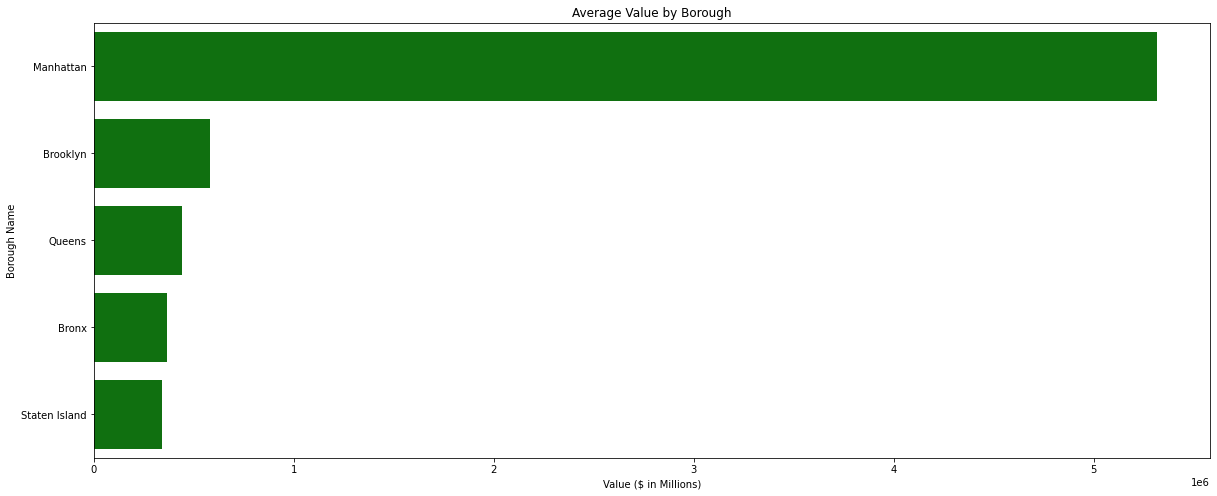

In [23]:
# fix this
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(borough.values, borough.index, color='green')
ax.set_title('Average Value by Borough') 
ax.set_ylabel('Borough Name')
ax.set_xlabel('Value ($ in Millions)')
ax.ticklabel_format(axis = 'x')

## Highest Mean Value Zip Code

In [24]:
nyc['Zipcode'].nunique()

114

There are 114 unique zipcodes for New York City.

In [25]:
nyc.Zipcode.unique()

array([10467, 11226, 11375, 11235, 10128, 10462, 10463, 11230, 11209,
       11212, 11214, 11221, 11229, 11377, 11234, 11355, 10314, 11215,
       11211, 11385, 11373, 11233, 11236, 11372, 11218, 11223, 11208,
       11204, 11219, 11368, 11203, 11220, 11216, 11354, 10466, 11374,
       10473, 11210, 11434, 11224, 10306, 11691, 10469, 10312, 10461,
       11106, 11432, 11222, 11435, 11365, 11103, 11367, 11102, 10304,
       10301, 11357, 10305, 11105, 10465, 11364, 11358, 11104, 11228,
       11379, 11413, 11420, 11414, 10309, 11361, 11412, 10471, 11378,
       11421, 11419, 11433, 11360, 10308, 11415, 11418, 11423, 11369,
       10310, 10303, 11422, 11694, 11417, 11427, 11692, 11370, 11356,
       11429, 11362, 11411, 10470, 11426, 10302, 11428, 11004, 11416,
       11436, 11366, 10307, 11363, 10464, 10459, 11238, 10021, 10014,
       11205, 11217, 11231, 10011, 11101, 10456], dtype=int64)

In [26]:
zipcodes = nyc.groupby('Zipcode').value.mean()

In [27]:
top_zipcodes = zipcodes.sort_values(ascending = False).head()
top_zipcodes

Zipcode
10021    1.285427e+07
10011    7.755844e+06
10014    6.836902e+06
10128    5.085436e+06
11217    1.977407e+06
Name: value, dtype: float64

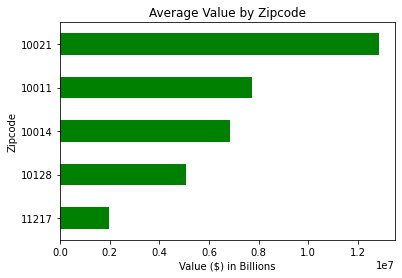

In [28]:
top_zipcodes.sort_values().plot.barh(color = 'g')
plt.title('Average Value by Zipcode')
plt.xlabel('Value ($) in Billions')
plt.show()

In [29]:
group = nyc.groupby(['Borough', 'Zipcode']).value.mean()
group

Borough        Zipcode
Bronx          10456      313059.615385
               10459      292612.921348
               10461      338021.132075
               10462      308724.150943
               10463      432449.056604
                              ...      
Staten Island  10308      353755.094340
               10309      398166.415094
               10310      322537.358491
               10312      361979.622642
               10314      352084.528302
Name: value, Length: 114, dtype: float64

### Manhattan

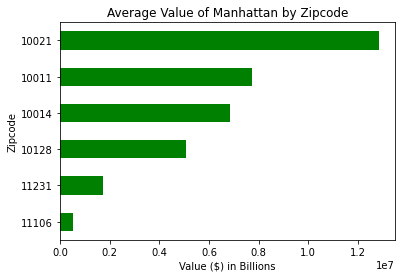

Zipcode
10021    1.285427e+07
10011    7.755844e+06
10014    6.836902e+06
10128    5.085436e+06
11231    1.748707e+06
Name: value, dtype: float64

In [30]:
# create def function
# make these boroughs side by side
group['Manhattan'].sort_values().plot.barh(color = 'g')
plt.title('Average Value of Manhattan by Zipcode')
plt.xlabel('Value ($) in Billions')
plt.show()
group['Manhattan'].sort_values(ascending = False).head()

### Brooklyn

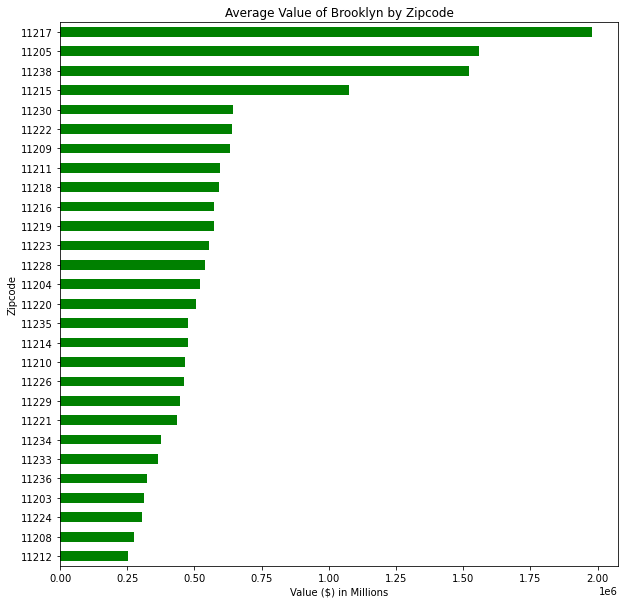

Zipcode
11217    1.977407e+06
11205    1.557881e+06
11238    1.520451e+06
11215    1.074962e+06
11230    6.449887e+05
Name: value, dtype: float64

In [31]:
# fix
fig, ax = plt.subplots(figsize=(10,10))
group['Brooklyn'].sort_values().plot.barh(color = 'g')
plt.title('Average Value of Brooklyn by Zipcode')
plt.xlabel('Value ($) in Millions')
plt.show()
group['Brooklyn'].sort_values(ascending = False).head()

### Queens

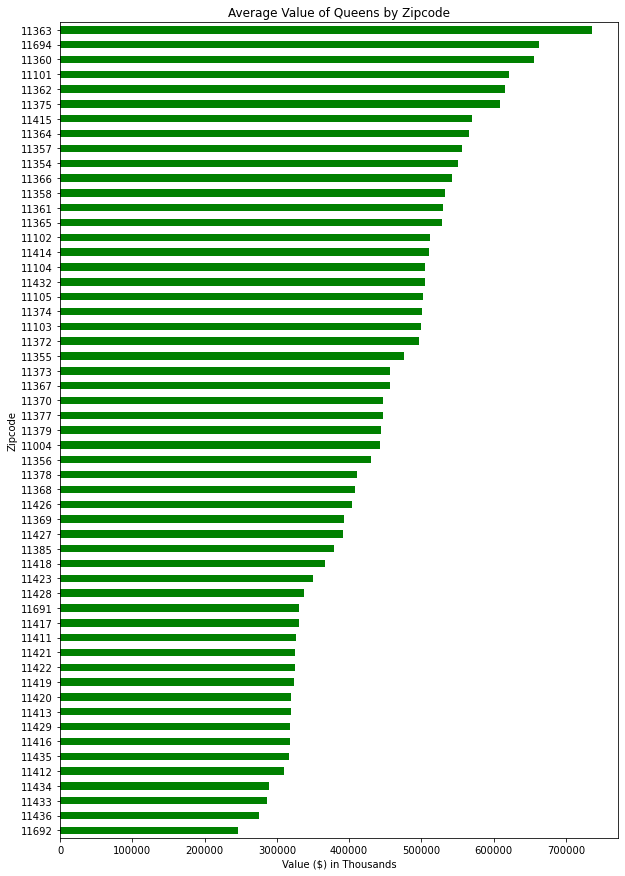

Zipcode
11363    735301.132075
11694    663121.509434
11360    656026.415094
11101    621317.105263
11362    615289.811321
Name: value, dtype: float64

In [32]:
fig, ax = plt.subplots(figsize=(10,15))
group['Queens'].sort_values().plot.barh(color = 'g')
plt.title('Average Value of Queens by Zipcode')
plt.xlabel('Value ($) in Thousands')
plt.show()
group['Queens'].sort_values(ascending = False).head()

### Staten Island

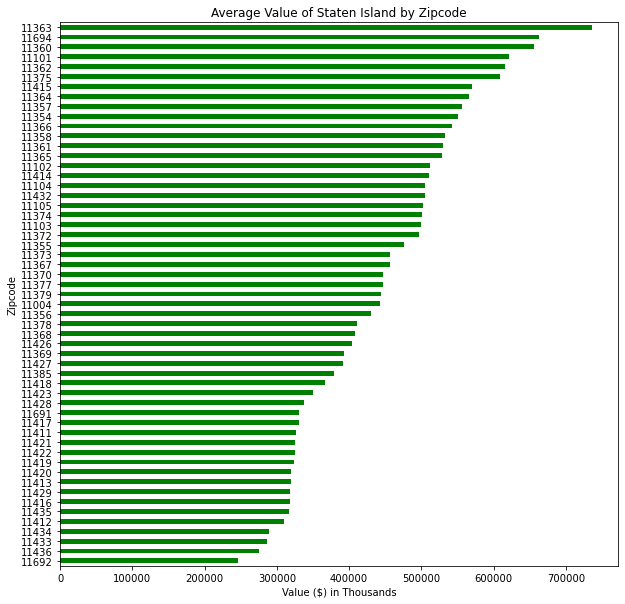

Zipcode
11363    735301.132075
11694    663121.509434
11360    656026.415094
11101    621317.105263
11362    615289.811321
Name: value, dtype: float64

In [33]:
fig, ax = plt.subplots(figsize=(10,10))
group['Queens'].sort_values().plot.barh(color = 'g')
plt.title('Average Value of Staten Island by Zipcode')
plt.xlabel('Value ($) in Thousands')
plt.show()
group['Queens'].sort_values(ascending = False).head()

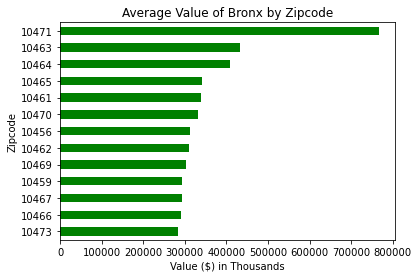

Zipcode
10471    766486.792453
10463    432449.056604
10464    408178.867925
10465    340500.754717
10461    338021.132075
Name: value, dtype: float64

In [34]:
group['Bronx'].sort_values().plot.barh(color = 'g')
plt.title('Average Value of Bronx by Zipcode')
plt.xlabel('Value ($) in Thousands')
plt.show()
group['Bronx'].sort_values(ascending = False).head()

### Trend Post Market Crisis

In [35]:
trend = nyc['2009':]
trend = trend.groupby('time').aggregate({'value':'mean'})
trend
# change values to full number

,value
time,
2009-01-01,7.724545e+05
2009-02-01,7.706821e+05
2009-03-01,7.696062e+05
2009-04-01,7.690875e+05
2009-05-01,7.669411e+05
...,...
2017-12-01,1.176734e+06
2018-01-01,1.182094e+06
2018-02-01,1.185925e+06


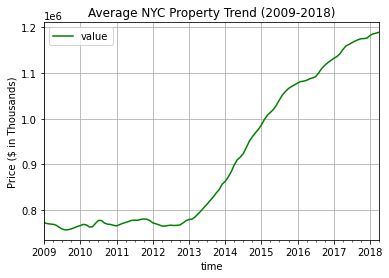

In [36]:
plot_trend(trend, 'Average NYC Property Trend (2009-2018)')
# ask to change the y axis to thousands

We see here that there is an annual linear increase starting in 2013

<AxesSubplot:xlabel='time'>

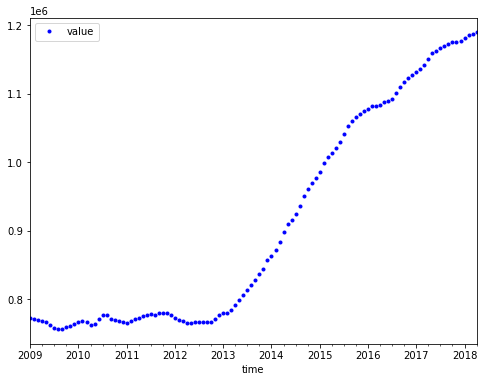

In [37]:
trend.plot(figsize = (8,6), style = '.b')
# plt.title(title)
# plt.ylabel('Price ($ in Thousands)')
# plt.grid()
# plt.show()

## Average ROI

The metric we will be using will be Zillow's most citied metric the Zillow Home Value Index (ZHVI). The formula we will be using according to the ZHVI is growth over past year and forecasted growth over the next year.

For example, to show how much home prices have grown for a region over the prior year and how much they are forecasted to grow in the coming year the formula is shown below:

***
$\mathbf{\text{Calculating historial growth over the past year}}$<br>
***
$$ Price Growth = 100 * ((this month current year - this month last year) / this month last year) $$
***
$\mathbf{\text{Calculating forecasted growth over the next year}}$<br>
***
$$ Forecasted Price Growth = 100 * ((this month next year - this month current year) / this month current year) $$

In [38]:
nyc_8yrs = nyc_df.copy()
nyc_8yrs.drop(columns = nyc_df.loc[:,'1996-04':'2009-12'], inplace = True)


In [39]:
# change column name to avg roi
nyc_8yrs['ROI'] = round(((nyc_8yrs['2018-04']-nyc_8yrs['2010-01'])/nyc_8yrs['2010-01']),4)

In [40]:
nyc_8yrs.isnull().sum()

RegionID      0
RegionName    0
City          0
State         0
Metro         0
             ..
2018-01       0
2018-02       0
2018-03       0
2018-04       0
ROI           2
Length: 108, dtype: int64

In [41]:
nyc_8yrs[nyc_8yrs['ROI'].isna()]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI
36,61796,10456,New York,NY,New York,Bronx,37,NaN,NaN,NaN,...,357100,356500,357200,362000,368500,374100,379800,388100,394400,NaN
1299,62004,11101,New York,NY,New York,Queens,1300,NaN,NaN,NaN,...,739000,708300,698500,711200,742900,767300,769700,767200,782500,NaN


In [42]:
nyc_8yrs.bfill(inplace = True)

In [43]:
nyc_8yrs[nyc_8yrs['ROI'].isna()]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI


In [44]:
nyc_8yrs.isnull().sum().sum()

0

In [45]:
nyc_8yrs = melt_data_roi(nyc_8yrs)

nyc_8yrs.drop(columns=['RegionID','SizeRank', 'State', 'Metro'], axis = 1, inplace = True)

In [46]:
nyc_8yrs = nyc_8yrs.rename({'RegionName':'Zipcode'}, axis = 'columns')

In [47]:
nyc_8yrs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11400 entries, 0 to 11399
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Zipcode     11400 non-null  int64         
 1   City        11400 non-null  object        
 2   CountyName  11400 non-null  object        
 3   ROI         11400 non-null  float64       
 4   time        11400 non-null  datetime64[ns]
 5   value       11400 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 623.4+ KB


In [48]:
group_roi = nyc_8yrs.groupby(['Zipcode']).ROI.mean()
group_roi

Zipcode
10011    0.6916
10014    0.4905
10021    0.5214
10128    0.2344
10301    0.3218
          ...  
11435    0.3365
11436    0.3073
11691    0.1842
11692    0.1823
11694    0.1033
Name: ROI, Length: 114, dtype: float64

In [49]:
group_roi.sort_values(ascending = False)

Zipcode
11216    2.2613
11222    1.8284
11211    1.6376
11221    1.5559
11238    1.4123
          ...  
11412    0.2025
11691    0.1842
11692    0.1823
10464    0.1363
11694    0.1033
Name: ROI, Length: 114, dtype: float64

In [50]:
top5_roi = group_roi.sort_values(ascending = False).head()
top5_roi

Zipcode
11216    2.2613
11222    1.8284
11211    1.6376
11221    1.5559
11238    1.4123
Name: ROI, dtype: float64

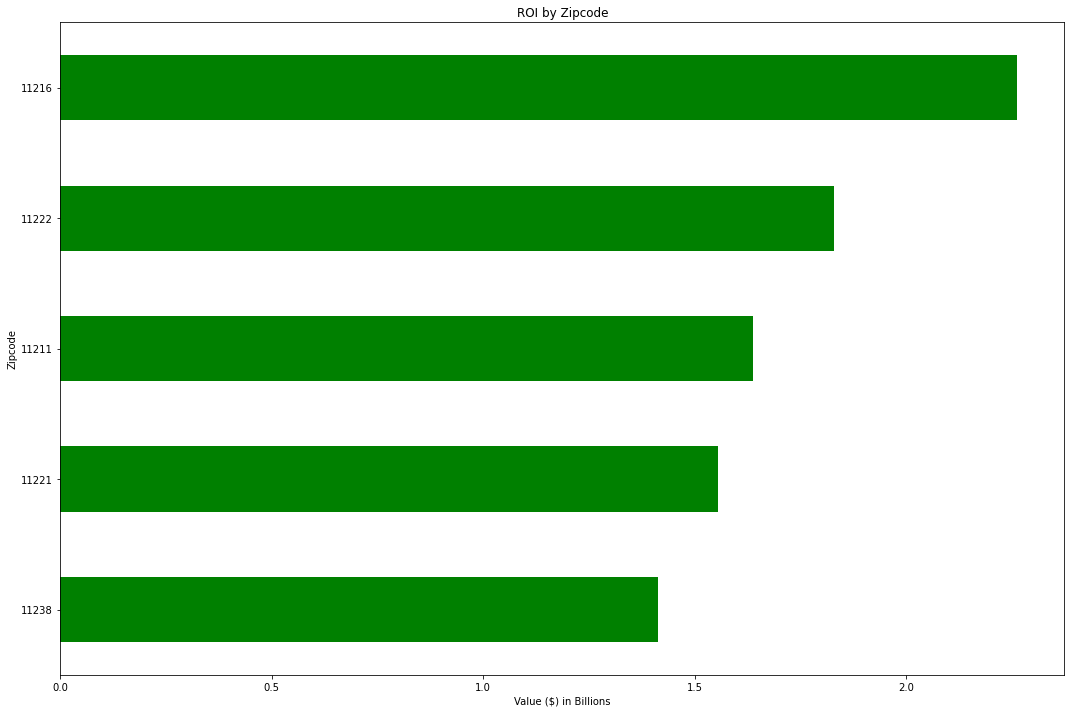

In [51]:
fig,ax=plt.subplots(figsize=(18,12))
top5_roi.sort_values().plot.barh(color = 'g')
plt.title('ROI by Zipcode')
plt.xlabel('Value ($) in Billions')
plt.show()

In [52]:
top10_roi = group_roi.sort_values(ascending = False).head(10)
top10_roi

Zipcode
11216    2.2613
11222    1.8284
11211    1.6376
11221    1.5559
11238    1.4123
11217    1.3671
11231    1.3495
11233    1.3173
11106    1.1228
11102    1.0331
Name: ROI, dtype: float64

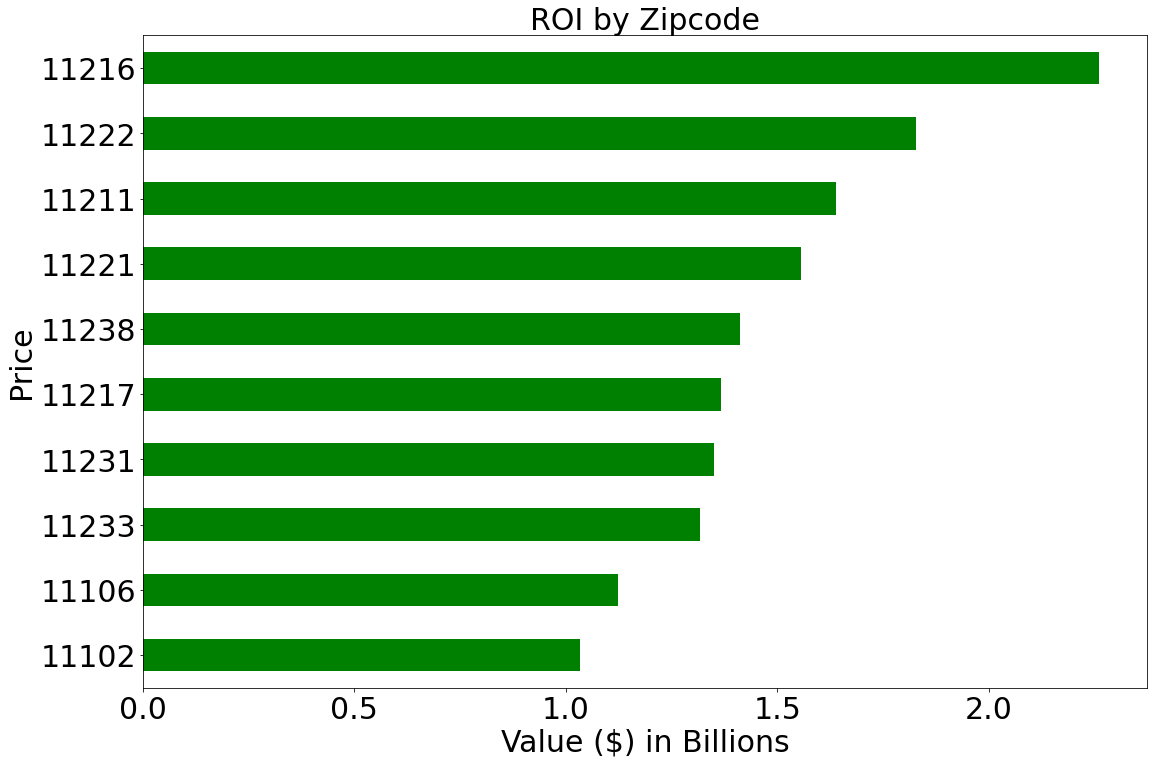

In [63]:
fig,ax=plt.subplots(figsize=(18,12))
top10_roi.sort_values().plot.barh(color = 'g', fontsize=30)
plt.title('ROI by Zipcode', fontsize=30)
plt.xlabel('Value ($) in Billions', fontsize=30)
plt.ylabel('Price', fontsize=30)

plt.show()